In [2]:
# import all libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import re
from struct import *

### Depth Estimation from Stereo Images

In [3]:
def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

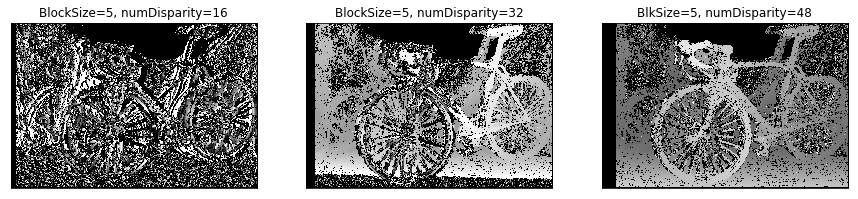

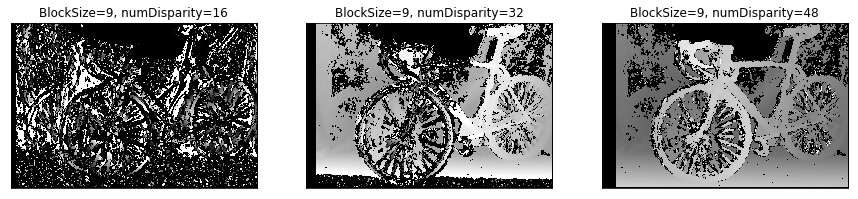

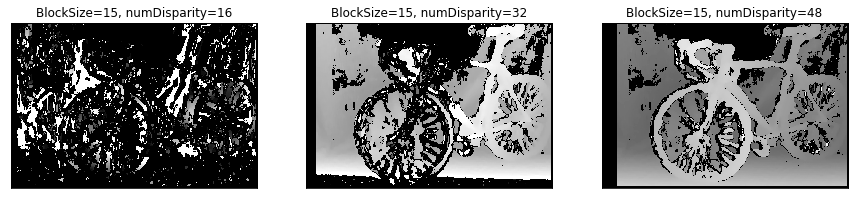

In [6]:
# load left and right images
imgL = cv2.imread('./Bicycle1-perfect/im0.png');
imgR = cv2.imread('./Bicycle1-perfect/im1.png');

# resize images for fast processing
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

depth_map = []

# convert to grayscale
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# create 2 arrays to store blockSize and numDisparities
block = np.array([5,9,15])
disparities = np.array([16,32,48])


# compute disparity map
for i in range(0,3,1):
    for j in range(0,3,1):
        stereo = cv2.StereoBM_create(numDisparities=disparities[j], blockSize=block[i])
        disparity = stereo.compute(imgL_gray, imgR_gray)
        depth_map.append(disparity)

# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(depth_map[0], cmap="gray")
plt.title("BlockSize=5, numDisparity=16"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(depth_map[1], cmap="gray")
plt.title("BlockSize=5, numDisparity=32"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(depth_map[2], cmap="gray")
plt.title("BlkSize=5, numDisparity=48"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(depth_map[3], cmap="gray")
plt.title("BlockSize=9, numDisparity=16"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(depth_map[4], cmap="gray")
plt.title("BlockSize=9, numDisparity=32"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(depth_map[5], cmap="gray")
plt.title("BlockSize=9, numDisparity=48"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(depth_map[6], cmap="gray")
plt.title("BlockSize=15, numDisparity=16"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(depth_map[7], cmap="gray")
plt.title("BlockSize=15, numDisparity=32"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(depth_map[8], cmap="gray")
plt.title("BlockSize=15, numDisparity=48"), plt.xticks([]), plt.yticks([])
plt.show()



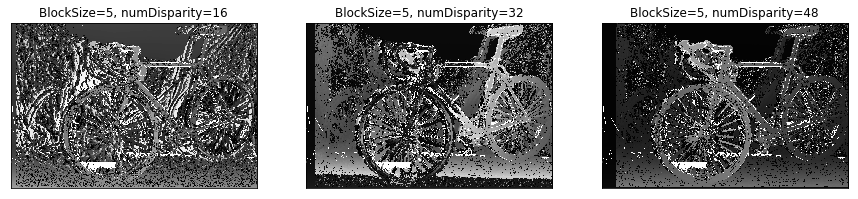

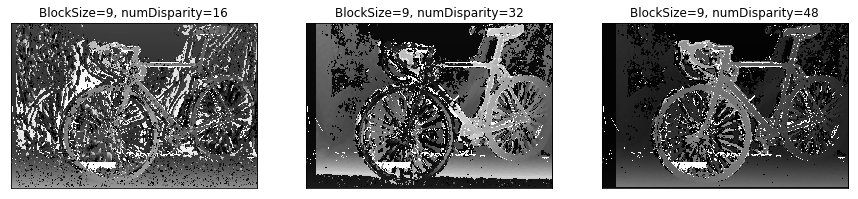

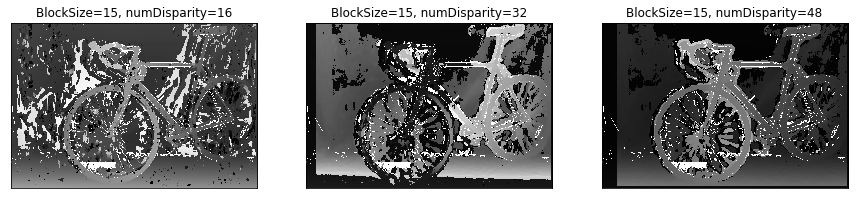

In [7]:
#  load ground truth
ground_truth = read_pfm('./Bicycle1-perfect/disp0.pfm')

ground_truth = cv2.resize(ground_truth, None, fx=0.3, fy=0.3)

disparity_array = []

# create array to store the disparity image
disparity_img = np.zeros(shape=(ground_truth.shape[0],ground_truth.shape[1]))


# compute the pixel-wise squared-difference error
for idx in range(0,len(depth_map),1):
    for x in range(0,ground_truth.shape[0],1): 
        for y in range(0,ground_truth.shape[1],1):  
            error = np.power((depth_map[idx])[x,y] - ground_truth[x,y],2)
            disparity_img[x,y] = error
    
    disparity_array.append(disparity_img)
    disparity_img = np.zeros(shape=(ground_truth.shape[0],ground_truth.shape[1]))

# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(disparity_array[0], cmap="gray")
plt.title("BlockSize=5, numDisparity=16"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(disparity_array[1], cmap="gray")
plt.title("BlockSize=5, numDisparity=32"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity_array[2], cmap="gray")
plt.title("BlockSize=5, numDisparity=48"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(disparity_array[3], cmap="gray")
plt.title("BlockSize=9, numDisparity=16"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(disparity_array[4], cmap="gray")
plt.title("BlockSize=9, numDisparity=32"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity_array[5], cmap="gray")
plt.title("BlockSize=9, numDisparity=48"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(disparity_array[6], cmap="gray")
plt.title("BlockSize=15, numDisparity=16"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(disparity_array[7], cmap="gray")
plt.title("BlockSize=15, numDisparity=32"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity_array[8], cmap="gray")
plt.title("BlockSize=15, numDisparity=48"), plt.xticks([]), plt.yticks([])
plt.show()


### Reasoning Question
The block size is the size of the kernel window that we use to scan the image. If the block size is large, the neighbouring pixels around the center would be more considered, so the end picture would be more smooth, has blurry edges and will be less accurate. If the block size is small, the depth image will be more detailed, but might have wrong depth computations for the corresponding patch.

numDisparity is the number of depth levels that can be shown on the image. A higher numDisparity would output a more accurate image because more different levels of depth can be shown. As numDisparity increases, we will also get a clearer image because the edges will be more distinct and the large/small depths can be shown more clearly.


